# Physics Take Home Exam

* Name: 施文祥
* ID:  D0565617

## Q1

# RC series circuit

![rc circuit](https://upload.wikimedia.org/wikipedia/commons/6/6a/Series-RC.svg)

![formula of voltage](https://wikimedia.org/api/rest_v1/media/math/render/svg/cf6229d806939582c1c1874c1c2403c6efca30f9)

Assumption

V0: `5 voltage`
C: `100 * 10**(-6) F`
R: `500 om`

In [1]:
v0 = 5.0
C = 10000 * 10**(-6)
R = 5000.0
e = 2.71828
time_period = 500

import numpy as np  
import matplotlib.pyplot as plt  

def graph(formula, time_range, direction, title, xlabel, ylabel):
    #     x = np.array(x_range) * time_unit
    x = np.linspace(0,1,time_range) * direction
    y = formula(x)
#     plt.annotate('x at R/C', xy=(1 - C/R, v0 * 0.63), xytext=(1 - C/R , v0 * 0.63),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid(True)
    plt.plot(abs(x), y)
    plt.show()


def voltage(t):
    return v0* (e **(-t/(R*C)))


def voltage_change(t):
    return v0* (1 - e **(-t/(R*C)))

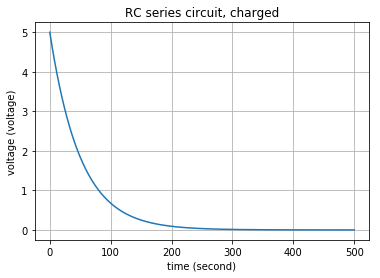

In [2]:
graph(voltage, time_period, 500.0, 'RC series circuit, charged', 'time (second)', 'voltage (voltage)')

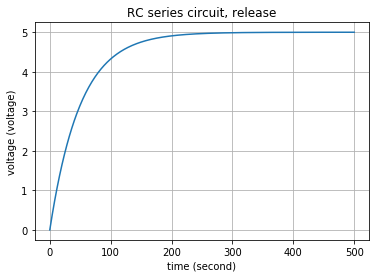

In [3]:
graph(voltage_change, time_period, 500.0, 'RC series circuit, release', 'time (second)', 'voltage (voltage)')

### NOTE

`The following links are samples from internet. An honest student should not submit his or her answer which is copied from the websites.`

* https://gist.github.com/mick001/52466504274e255a7720
* http://firsttimeprogrammer.blogspot.tw/2015/07/electric-circuits-101-rc-and-rl-circuits.html
* http://kozikr.github.io/RC-circuit/

# Q2


# Find particle's path in the magenitic and electronic field

### Decription

```
 charged particle of mass m = 1.67 ×10−27 (kg) and charge q = 1.6 ×10−19 (Coul) is inside a uniform magnetic field B⃗ = 2zˆ (Tesla) and a uniform electric field E⃗ = 1yˆ (N/C), with initial velocity ⃗v0 = (0, 0, 0) (m/s). Write a computer program with Newton’s second law of motion and find the particle’s trajectory of ⃗r (t) = xˆrx (t) + yˆry (t) + zˆrz (t). You will plot the trajectory in 3-Dimensional diagram starting with t = 0 and along its progress in time.
 ```

In [4]:
import numpy as np

In [5]:
# constant

# [x, y, z]
B = np.array([0,0,2])
E = np.array([0,1,0])

#  m = 1.67 ×10−27
m = 1.67 * (10 ** - 27)

#  q = 1.6 ×10−19
q = 1.6 * (10 ** -19)

# v0 = (0, 0, 0)
v0 = np.array([0, 0, 0])

# ⃗r0 = (0,0,0)
r0 = np.array([0, 0, 0])

# alpha = q * B / m

# a
Ae = E / m

alpha = q * B / m


In [6]:
# F = q * (E + v X B)

def solution(displacement, velocity, t):
    a = (q / m) * (E + np.cross(velocity, B))
    v2 = velocity + a * t
#     print("0.5 * a * t ** 2 {}".format(0.5 * a * t ** 2))
    displacement = displacement + v2 * t
    return displacement, v2
#     force = self.charge * np.cross(self.velocity, bField) + self.charge * eField
#     # force = mass * acceleration => acceleration = mass/force
#     acceleration = force/self.mass
#     self.velocity += acceleration * timeStep
#     self.position += self.velocity * timeStep
def r_positions(time_range, fragment, velocity):
    t = np.linspace(0, time_range, fragment)
    displacement = r0
    positions = []
    for point in t:
        positions.append(displacement)
        displacement, velocity = solution(displacement, velocity, point)
    return np.array(positions)

In [7]:
dis_1 = r_positions(4e-11, 4800, v0)
# v0
# dis_1

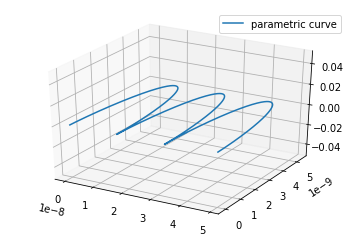

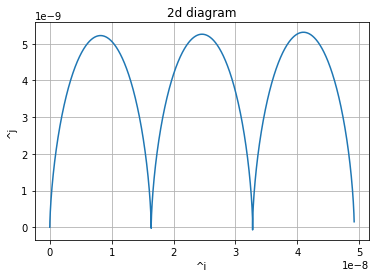

In [8]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(dis_1[:,0],
        dis_1[:,1],
        dis_1[:,2],
        label='parametric curve')
ax.legend()

plt.show()

plt.plot(dis_1[:,0], dis_1[:,1] )
plt.xlabel('^i')
plt.ylabel('^j')
plt.title('2d diagram')
plt.grid(True)
plt.show()




# Q3

# Question 4

In [9]:
v1 = np.array([0.,1.0e0,2.0e0])


def solution_3(displacement, velocity, t):
    a = (q / m) * (np.array([0., 0., 0.]) + np.cross(velocity, B))
    v2 = velocity + a * t
    displacement = displacement + v2 * t + 0.5 * a * (t ** 2)
    return displacement, v2

def r_positions_3(time_range, fragment, velocity):
    t = np.linspace(0, time_range, fragment)
    displacement = r0
    positions = []
    for point in t:
        positions.append(displacement)
        displacement, velocity = solution_3(displacement, velocity, point)
    return np.array(positions)

In [10]:
dis_3 = r_positions_3(4.29e-11, 3500, v1)

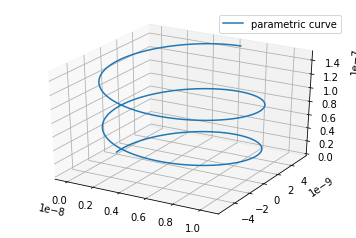

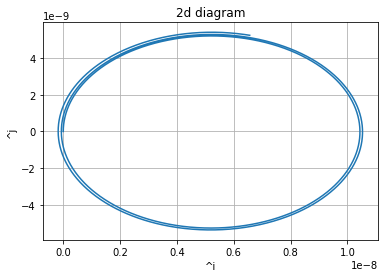

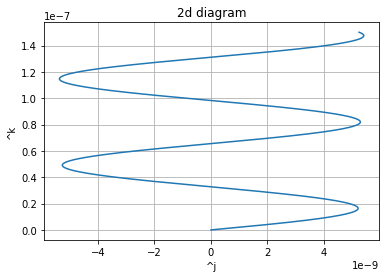

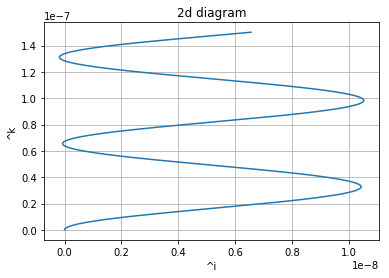

In [11]:

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(dis_3[:,0],
        dis_3[:,1],
        dis_3[:,2],
        label='parametric curve')
# ax.plot(np.array(r_final_matrix[:,0]).flatten(),
#         np.array(r_final_matrix[:,1]).flatten(),
#         np.array(r_final_matrix[:,2]).flatten(),
#         label='parametric curve')
ax.legend()

plt.show()



plt.plot(dis_3[:,0], dis_3[:,1] )
plt.xlabel('^i')
plt.ylabel('^j')
plt.title('2d diagram')
plt.grid(True)
plt.show()

plt.plot(dis_3[:,1], dis_3[:,2] )
plt.xlabel('^j')
plt.ylabel('^k')
plt.title('2d diagram')
plt.grid(True)
plt.show()


plt.plot(dis_3[:,0], dis_3[:,2] )
plt.xlabel('^i')
plt.ylabel('^k')
plt.title('2d diagram')
plt.grid(True)
plt.show()




## Q5

In [12]:
# variables

Xstart = 0.0
Xend = 0.15
Vinit = 0
tDelta = 1 * (10 ** -16)
# start from 0 second
time = 0

# constant
k = 9.0 * (10.0 ** 9)
e = 1.6 * (10 ** -19)
Me = 9.1 * (10 ** -31)

# input
# x: displacement
# velocity: velocity
# accleration accleration
# time time
def solution(x, velocity, acceleration, time):
    x2 = x + velocity * time + 0.5 * acceleration * (time ** 2)
    # Find force(x)
    F = ( k * 3 * (10 ** -9) * e / ((0.25 - x2) ** 2) ) - ( k * 2 * (10 ** -9) * e / ((0.25 + x2) ** 2) )
    a = F / Me
    v = velocity + a * time
    time = time + tDelta
    return x2, v, a, time

In [13]:
Finit = ( k * 3 * (10 ** -9) * e / ((0.25) ** 2) ) - ( k * 2 * (10 ** -9) * e / ((0.25) ** 2) )
Finit

2.304e-17

In [14]:
Ainit = Finit / Me
Ainit

25318681318681.32

In [15]:
timeInit = 0
velocity = Vinit
acceleration = Ainit
x = Xstart
obj = {"x":[], "velocity": [], "acceleration": [], "time": []}
while True:
    x, velocity, acceleration, time = solution(x, velocity, acceleration, time)
    obj["x"].append(x)
    obj["velocity"].append(velocity)
    obj["acceleration"].append(acceleration)
    obj["time"].append(time)
    if (x >= Xend):
        print("Ans is {} * 10^6 [m/s]".format(velocity / (10 ** 6)))
        break

Ans is 6.891301465876989 * 10^6 [m/s]


## Velocity vs Time

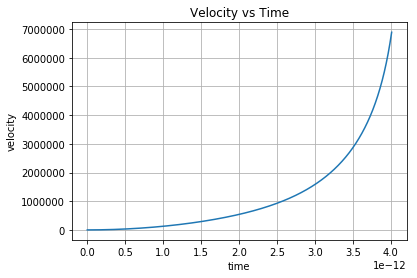

In [16]:
import matplotlib.pyplot as plt
plt.plot(obj["time"], obj["velocity"] )
plt.ylabel('velocity')
plt.xlabel('time')
plt.title('Velocity vs Time')
plt.grid(True)
plt.show()

## Displacement vs Time

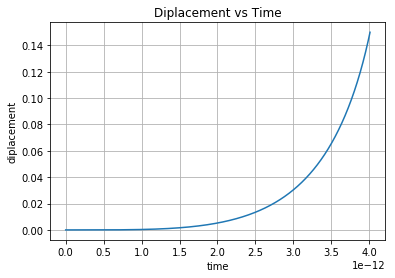

In [17]:
plt.plot(obj["time"], obj["x"] )
plt.ylabel('diplacement')
plt.xlabel('time')
plt.title('Diplacement vs Time')
plt.grid(True)
plt.show()

In [18]:
## Acceleration vs Time

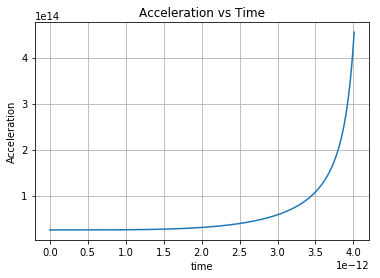

In [19]:
plt.plot(obj["time"], obj["acceleration"] )
plt.ylabel('Acceleration')
plt.xlabel('time')
plt.title('Acceleration vs Time')
plt.grid(True)
plt.show()